# Breast Cancer Detection

Develop a neural network classifier for breast cancer detection and then evaluate your classifier against a random forest. 

For full credit, you must comply with the following specifications:

1. Use the Scikit Learn Wisconsin Breast Cancer dataset
2. Classify the data using a Keras 128 node dense layer neural net with a 2 node classification layer 
3. Compare against a Random Forest algorithm (any implementation is fine)
4. Compute for each algorithm :
  1. the accuracy, precision, and recall
  2. the confusion matrix (does not need to be plotted)
  2. a plot of the ROC curve
5. Write a short paragraph (approx 3 sentences) evaluating the tradeoffs of your two approachs for detecting breast cancer. 

In [54]:
from sklearn.datasets import load_breast_cancer              
from sklearn.ensemble import RandomForestClassifier                               
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import models
from tensorflow.keras import models,layers,optimizers
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


#### Use the Scikit Learn Wisconsin Breast Cancer datase

In [10]:
cancer = load_breast_cancer()
#print(cancer.DESCR)

In [3]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print(cancer.target_names)

['malignant' 'benign']


In [5]:
type(cancer.data)
cancer.data.shape

(569, 30)

In [13]:
df = pd.DataFrame(cancer.data)
#print(df.head())

In [15]:
df.columns = cancer.feature_names
#print(df.head())

In [20]:
df.isnull().sum()
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sc = StandardScaler()
X = sc.fit_transform(X)
y = pd.DataFrame(cancer.target, columns=["target"])
l = LabelEncoder()
y = l.fit_transform(y)

C:\Users\sonali\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)

In [34]:
def evaluate_classifier(clf,X_train, X_val,X_test, y_train, y_val, y_test):
    #y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)
    print("accuracy_score on validation set:",accuracy_score(y_val, y_pred_val))
    print("f1_score  on validation  set:", f1_score(y_val, y_pred_val))
    print("precision_score on validation  set:", precision_score(y_val, y_pred_val))
    print("recall_score on validation  set:", recall_score(y_val, y_pred_val))
    print("accuracy_score on test set:",accuracy_score(y_test, y_pred_test))
    print("f1_score  on test  set:", f1_score(y_test, y_pred_test))
    print("precision_score on test  set:", precision_score(y_val, y_pred_val))
    print("recall_score on test  set:", recall_score(y_val, y_pred_val))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
print('Random Forest')
evaluate_classifier(rf,X_train,X_val,X_test,y_train,y_val,y_test)


Random Forest
accuracy_score on validation set: 0.9560439560439561
f1_score  on validation  set: 0.9636363636363636
precision_score on validation  set: 0.9636363636363636
recall_score on validation  set: 0.9636363636363636
accuracy_score on test set: 0.9649122807017544
f1_score  on test  set: 0.9722222222222222
precision_score on test  set: 0.9636363636363636
recall_score on test  set: 0.9636363636363636


In [37]:
X_train_nn = np.array(X_train_val)

y_train_oh = pd.get_dummies(data= y_train_val)
y_train_nn = np.array(y_train_oh)
X_test_nn = np.array(X_test)
X_val_nn = np.array(X_val)

y_test_nn = pd.get_dummies(data = y_test)
y_val_nn = pd.get_dummies(data = y_val)

X_train_nn1 = np.asarray(X_train_val).astype(np.float32)
y_train_nn1 = np.asarray(y_train_oh)

X_test_nn1 = np.asarray(X_test_nn).astype(np.float32)
y_test_nn1 = np.asarray(y_test_nn).astype(np.float32)

X_val_nn1 = np.asarray(X_val_nn).astype(np.float32)
y_val_nn1 = np.asarray(y_val_nn).astype(np.float32)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten
import tensorflow as tf

metrics = [
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Accuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()]


model = Sequential()
model.add(Dense(128,input_dim=30,activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = metrics)
history = model.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs = 5,batch_size = 10)


Train on 364 samples, validate on 91 samples
Epoch 1/5
364/364 [==============================] - 4s 10ms/sample - loss: 0.3424 - auc_2: 0.9363 - accuracy: 0.0000e+00 - precision_2: 0.8571 - recall_2: 0.8571 - val_loss: 0.1596 - val_auc_2: 0.9894 - val_accuracy: 0.0000e+00 - val_precision_2: 0.9560 - val_recall_2: 0.9560
Epoch 2/5
364/364 [==============================] - 0s 588us/sample - loss: 0.1330 - auc_2: 0.9918 - accuracy: 0.0000e+00 - precision_2: 0.9533 - recall_2: 0.9533 - val_loss: 0.1275 - val_auc_2: 0.9924 - val_accuracy: 0.0055 - val_precision_2: 0.9670 - val_recall_2: 0.9670
Epoch 3/5
364/364 [==============================] - 0s 612us/sample - loss: 0.0981 - auc_2: 0.9960 - accuracy: 0.0000e+00 - precision_2: 0.9780 - recall_2: 0.9780 - val_loss: 0.1177 - val_auc_2: 0.9937 - val_accuracy: 0.0055 - val_precision_2: 0.9670 - val_recall_2: 0.9670
Epoch 4/5
364/364 [==============================] - 0s 497us/sample - loss: 0.0802 - auc_2: 0.9968 - accuracy: 0.0000e+00 - pr

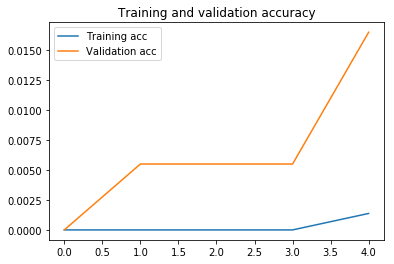

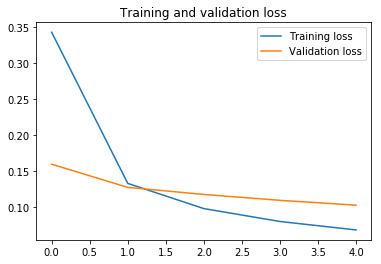

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972


ROC AUC=0.500
Logistic: ROC AUC=0.908


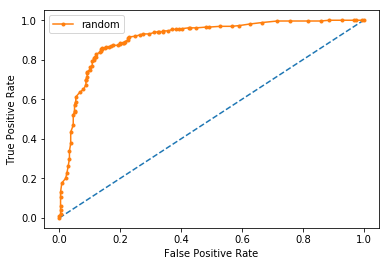

In [58]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = RandomForestClassifier()
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print('ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='random')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from the radom forest acc is 95  and the conveloutoion netwok caauracy is 99 
there is the probelm of overfitting
roc is 0.5

random foreset result 
accuracy_score on validation set: 0.95
f1_score  on validation  set: 0.96
precision_score on validation  set: 0.96
recall_score on validation  set: 0.963
accuracy_score on test set: 0.96
f1_score  on test  set: 0.972
precision_score on test  set: 0.96
recall_score on test  set: 0.96